In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [2]:
trainDir = r"/home/trojan/Desktop/dimentia/dataset/data_2categ/data_PGGAN/train"
valDir = r"/home/trojan/Desktop/dimentia/dataset/data_2categ/data_PGGAN/validation"
input_shape = Input(shape=(256, 256, 3))
dropout_rate = 0.25
batch_size = 16

In [3]:
def lr_schedule(epoch):
    lr = 1e-4 #1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 40: # 120
        lr *= 1e-2
    elif epoch > 20: #80
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = datagen.flow_from_directory(trainDir, target_size=(256, 256), batch_size=batch_size, 
                                                    class_mode='categorical', color_mode='rgb')

validation_generator = datagen.flow_from_directory(valDir, target_size=(256, 256), batch_size=batch_size,
                                                     class_mode='categorical', color_mode='rgb')

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

Found 9740 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


In [5]:
cnn_top = Conv2D(32, (5,5), padding='same', activation='relu')(input_shape)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Conv2D(512, (3,3), padding='same', activation='relu',)(cnn_top)
cnn_top = BatchNormalization()(cnn_top)
cnn_top = MaxPooling2D(pool_size=(2, 2))(cnn_top)
cnn_top = Flatten()(cnn_top)
cnn_top = Dense(256)(cnn_top)


#cropped_image = tf.keras.layers.experimental.preprocessing.CenterCrop(height=128, width=128)(input_shape)
cropped_image = tf.keras.layers.Cropping2D(cropping=((55, 65), (75, 75)))(input_shape)
cnn_mid = Conv2D(32, (5,5), padding='same', activation='relu')(cropped_image)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_mid)
cnn_mid = BatchNormalization()(cnn_mid)
cnn_mid = MaxPooling2D(pool_size=(2, 2))(cnn_mid)
cnn_mid = Flatten()(cnn_mid)
cnn_mid = Dense(256)(cnn_mid)

# #cropped_image = tf.keras.layers.experimental.preprocessing.CenterCrop(height=128, width=128)(input_shape)
# cropped_image2 = tf.keras.layers.Cropping2D(cropping=((100, 100), (100, 100)))(input_shape)
# cnn_3 = Conv2D(32, (5,5), padding='same', activation='relu')(cropped_image2)
# cnn_3 = BatchNormalization()(cnn_3)
# cnn_3 = MaxPooling2D(pool_size=(2, 2))(cnn_3)
# cnn_3 = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_3)
# cnn_3 = BatchNormalization()(cnn_3)
# cnn_3 = MaxPooling2D(pool_size=(2, 2))(cnn_3)
# cnn_3 = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_3)
# cnn_3 = BatchNormalization()(cnn_3)
# cnn_3 = MaxPooling2D(pool_size=(2, 2))(cnn_3)
# cnn_3 = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_3)
# cnn_3 = BatchNormalization()(cnn_3)
# cnn_3 = MaxPooling2D(pool_size=(2, 2))(cnn_3)
# cnn_3 = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_3)
# cnn_3 = BatchNormalization()(cnn_3)
# cnn_3 = MaxPooling2D(pool_size=(2, 2))(cnn_3)
# cnn_3 = Flatten()(cnn_3)
# cnn_3 = Dense(256)(cnn_3)

# cropped_image3 = tf.keras.layers.Cropping2D(cropping=((75, 75), (75, 75)))(input_shape)
# cnn_4 = Conv2D(32, (5,5), padding='same', activation='relu')(cropped_image3)
# cnn_4 = BatchNormalization()(cnn_4)
# cnn_4 = MaxPooling2D(pool_size=(2, 2))(cnn_4)
# cnn_4 = Conv2D(64, (3,3), padding='same', activation='relu')(cnn_4)
# cnn_4 = BatchNormalization()(cnn_4)
# cnn_4 = MaxPooling2D(pool_size=(2, 2))(cnn_4)
# cnn_4 = Conv2D(128, (3,3), padding='same', activation='relu')(cnn_4)
# cnn_4 = BatchNormalization()(cnn_4)
# cnn_4 = MaxPooling2D(pool_size=(2, 2))(cnn_4)
# cnn_4 = Conv2D(256, (3,3), padding='same', activation='relu')(cnn_4)
# cnn_4 = BatchNormalization()(cnn_4)
# cnn_4 = MaxPooling2D(pool_size=(2, 2))(cnn_4)
# cnn_4 = Conv2D(512, (3,3), padding='same', activation='relu')(cnn_4)
# cnn_4 = BatchNormalization()(cnn_4)
# cnn_4 = MaxPooling2D(pool_size=(2, 2))(cnn_4)
# cnn_4 = Flatten()(cnn_4)
# cnn_4 = Dense(256)(cnn_4)

In [7]:
merged_model = concatenate([cnn_top, cnn_mid])

#final_model = BatchNormalization()(final_model)
final_model = Dense(256)(merged_model)
final_model = BatchNormalization()(final_model)
#final_model = Dropout(dropout_rate)(final_model)
final_model = Dense(128)(merged_model)
#final_model = Dropout(dropout_rate)(final_model)
final_model = BatchNormalization()(final_model)
final_model = Dense(2)(final_model)
final_model = Activation('softmax')(final_model)

final_model = Model(input_shape, final_model)

In [8]:
final_model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr_schedule(0)),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model.summary()

Learning rate:  0.0001
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
cropping2d (Cropping2D)         (None, 136, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 2432        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 136, 106, 32) 2432        cropping2d[0][0]                 
________________________________________________________________

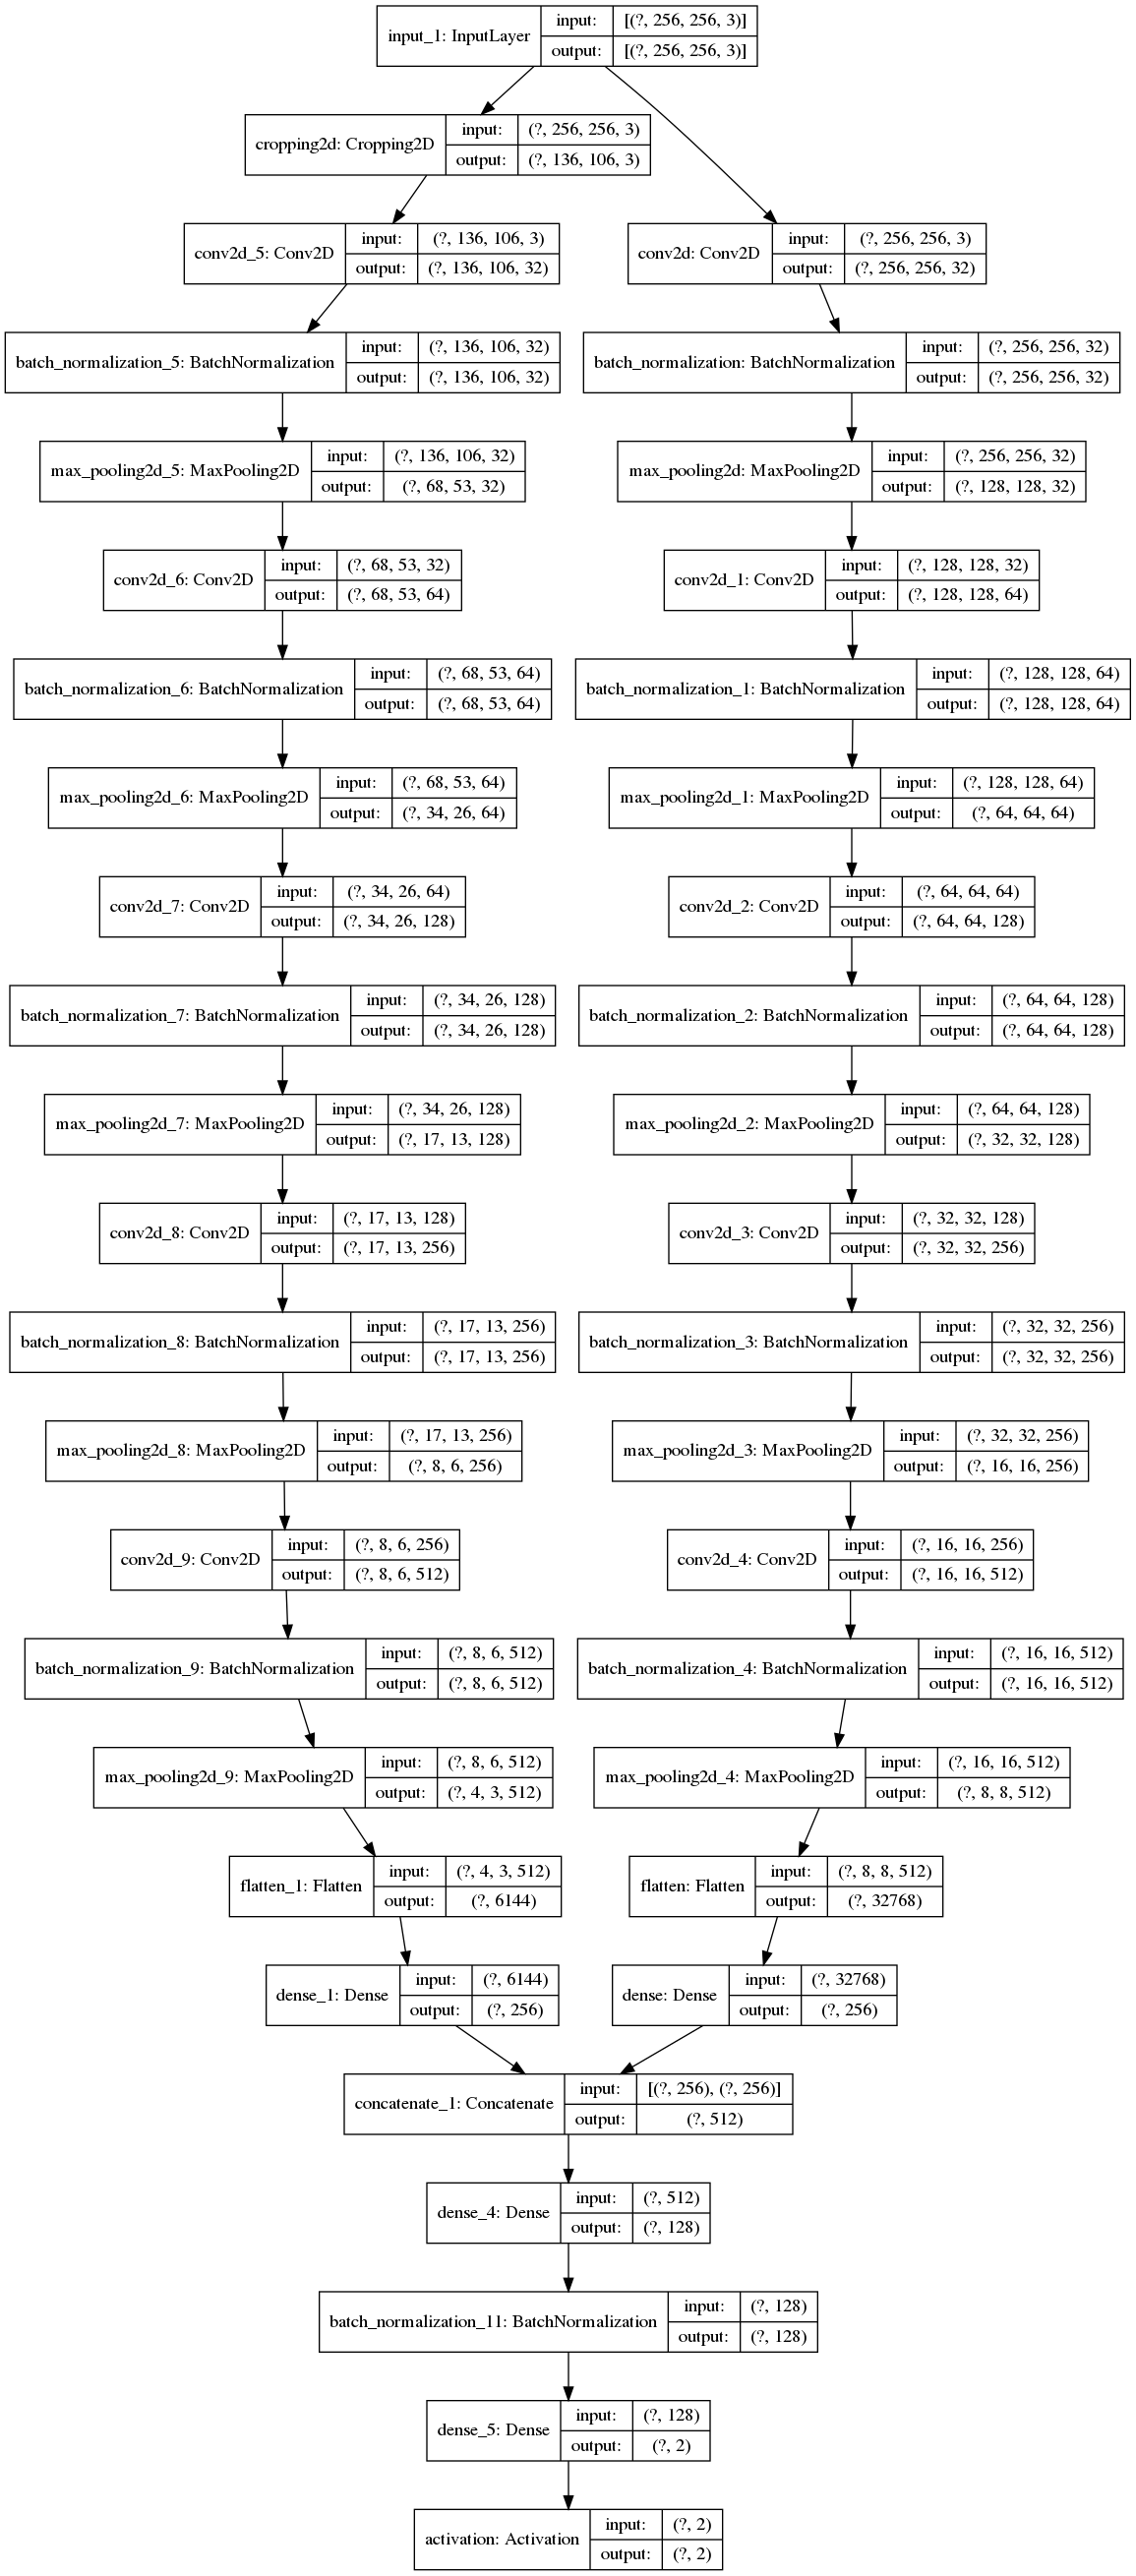

In [9]:
tf.keras.utils.plot_model(final_model, to_file='my_model.png', show_shapes=True)

In [10]:
checkpoint = ModelCheckpoint('best_model_cropped.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

In [11]:
#final_train_generator = zip(train_generator, train_generator, train_generator)
#final_test_generator  = zip(test_generator, test_generator, test_generator)
final_model.fit_generator(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=100,
                          validation_data=validation_generator, verbose=1, workers=1, 
                          validation_steps=STEP_SIZE_VALID, callbacks=checkpoint)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
608/608 [==============================] - ETA: 0s - loss: 0.3765 - accuracy: 0.8316
Epoch 00001: val_accuracy improved from -inf to 0.53571, saving model to best_model_cropped.h5
608/608 [==============================] - 41s 68ms/step - loss: 0.3765 - accuracy: 0.8316 - val_loss: 1.2154 - val_accuracy: 0.5357
Epoch 2/100
608/608 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9186
Epoch 00002: val_accuracy improved from 0.53571 to 0.62500, saving model to best_model_cropped.h5
608/608 [==============================] - 47s 78ms/step - loss: 0.1968 - accuracy: 0.9186 - val_loss: 1.0259 - val_accuracy: 0.6250
Epoch 3/100
608/608 [==============================] - ETA: 0s - loss: 0.1305 - accuracy: 0.9495
Epoch 00003: val_accuracy did not improve from 0.62500
608/608 [==============================] - 50s 82ms/step - loss: 0.1305 - accuracy: 0.9495 - val_loss: 2.7675 - val_acc

608/608 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9898
Epoch 00027: val_accuracy did not improve from 0.69643
608/608 [==============================] - 37s 61ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 1.6617 - val_accuracy: 0.6429
Epoch 28/100
608/608 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9948
Epoch 00028: val_accuracy improved from 0.69643 to 0.72321, saving model to best_model_cropped.h5
608/608 [==============================] - 38s 63ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 1.7364 - val_accuracy: 0.7232
Epoch 29/100
608/608 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 0.9942
Epoch 00029: val_accuracy did not improve from 0.72321
608/608 [==============================] - 39s 64ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 2.6798 - val_accuracy: 0.5982
Epoch 30/100
608/608 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9923
Epoch 00030: v

608/608 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9971
Epoch 00055: val_accuracy did not improve from 0.77679
608/608 [==============================] - 37s 61ms/step - loss: 0.0076 - accuracy: 0.9971 - val_loss: 3.9468 - val_accuracy: 0.5714
Epoch 56/100
608/608 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9952
Epoch 00056: val_accuracy did not improve from 0.77679
608/608 [==============================] - 37s 62ms/step - loss: 0.0168 - accuracy: 0.9952 - val_loss: 1.6825 - val_accuracy: 0.6875
Epoch 57/100
608/608 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9958
Epoch 00057: val_accuracy did not improve from 0.77679
608/608 [==============================] - 39s 65ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 2.2722 - val_accuracy: 0.6161
Epoch 58/100
608/608 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9973
Epoch 00058: val_accuracy did not improve from 0.77679
60

608/608 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9974
Epoch 00083: val_accuracy did not improve from 0.77679
608/608 [==============================] - 39s 65ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 3.9688 - val_accuracy: 0.6339
Epoch 84/100
608/608 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9984
Epoch 00084: val_accuracy did not improve from 0.77679
608/608 [==============================] - 37s 61ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 2.7614 - val_accuracy: 0.6696
Epoch 85/100
608/608 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9970
Epoch 00085: val_accuracy did not improve from 0.77679
608/608 [==============================] - 37s 61ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 1.5869 - val_accuracy: 0.6429
Epoch 86/100
608/608 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9969
Epoch 00086: val_accuracy did not improve from 0.77679
60

In [12]:
from tensorflow.keras.models import load_model
model = load_model('best_model_cropped.h5')

In [13]:
score = model.evaluate_generator(generator=validation_generator, verbose=1,
steps=STEP_SIZE_VALID)

print("Loss: ", score[0], "Accuracy: ", score[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
7/7 [==============================] - 0s 18ms/step - loss: 1.1207 - accuracy: 0.7679
Loss:  1.1206518411636353 Accuracy:  0.7678571343421936
